# Generative adversarial network

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Data Preprocessing

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

In [6]:
train_images.shape

(60000, 28, 28, 1)

In [7]:
train_images[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [8]:
train_images = (train_images - 127.5) / 127.5

In [9]:
train_images[0]

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [

In [10]:
buffer_size = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(BATCH_SIZE)

In [11]:
images = next(iter(train_dataset))

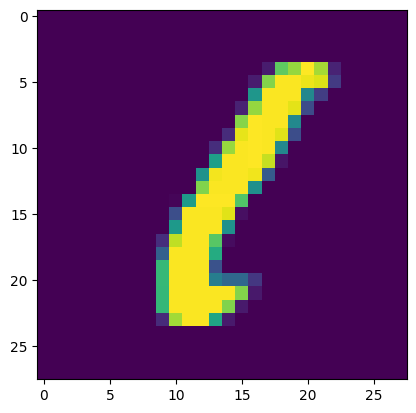

In [12]:
import matplotlib.pyplot as plt
plt.imshow(images[2])

## Create the models

### The Generator

In [13]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Reshape((7, 7, 256)))

  model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False))

  return model

In [14]:
generator = make_generator_model()


In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

In [16]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.41113716, -0.4502483 ,  0.8182132 ,  0.7782505 ,  2.478106  ,
         1.228002  ,  1.4290992 ,  0.35002035,  0.79699516, -0.5141351 ,
         1.0274808 ,  0.11298417, -1.03758   , -0.35239005,  1.3973496 ,
         1.1454463 ,  0.4037329 ,  1.5711817 , -0.5900059 , -1.7082003 ,
        -1.63375   , -0.73587143,  0.02197593,  1.0868334 , -0.7685723 ,
         0.55808055, -1.3128871 ,  0.34127817, -0.6448324 ,  0.37884143,
        -1.2350925 ,  1.9701396 ,  0.85000724,  1.0804138 ,  1.7418315 ,
        -1.3788475 ,  0.9518782 , -0.94223344, -0.25073567,  0.00736164,
         1.3764405 , -0.85990906,  0.44780642,  1.9116752 , -1.7287773 ,
        -0.31341442, -0.48633668, -1.0380561 , -0.087111  , -0.5958742 ,
         1.3471779 , -2.6333594 , -0.34126952,  2.1943324 ,  0.7898194 ,
        -0.70528674,  0.55531085,  0.47644433, -0.93262696, -0.64976954,
         0.6543632 , -0.50684255, -0.46328938, -1.2649812 ,  1.7109442 ,
 

In [17]:
generated_image = generator(noise, training=False)

In [18]:
generated_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[-2.34348932e-03],
         [ 1.30244414e-03],
         [-2.33808230e-03],
         [ 5.21027762e-03],
         [ 1.05819083e-03],
         [ 1.19873602e-02],
         [-5.25377877e-03],
         [ 1.49893733e-02],
         [ 5.75275859e-03],
         [ 1.72311207e-03],
         [ 8.65431596e-03],
         [ 8.04825127e-03],
         [-1.15158921e-02],
         [-1.24138901e-02],
         [-4.28182352e-03],
         [-1.79342739e-03],
         [ 5.23451995e-03],
         [ 1.69367436e-03],
         [-8.20725318e-03],
         [ 1.04134409e-02],
         [-3.76971695e-03],
         [-6.69144094e-03],
         [ 7.94008747e-03],
         [-3.42332572e-03],
         [-2.75524240e-03],
         [ 5.94027061e-03],
         [-7.53946276e-03],
         [ 1.13562178e-02]],

        [[ 2.03095609e-03],
         [ 7.80633930e-03],
         [ 3.21082119e-03],
         [-6.69374876e-03],
         [ 2.77750269e-02],
         [-1.37424

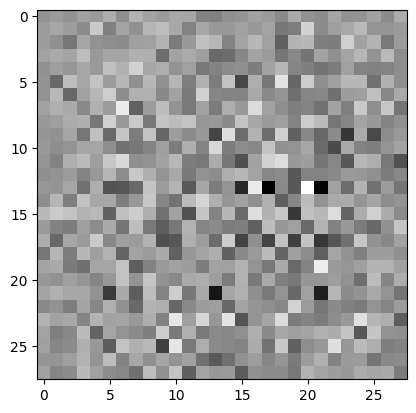

In [19]:
plt.imshow(tf.reshape(generated_image, (28, 28)), cmap='gray')

### Discriminator

In [20]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1))

  return model

In [21]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00237438]], dtype=float32)>

# define loss and optimizers

In [34]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [35]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [36]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [37]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)